## Step 0: Load The Data and Step 1: Dataset Summary & Exploration

In [1]:
# Load pickled data
import pickle
import csv
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)
image_shape = X_train[0].shape

labels = []
with open('signnames.csv','r') as csvfile:
    read = csv.reader(csvfile, delimiter = ',')
    for i in read:
        labels += [i[1]]
    labels = labels[1:]
n_classes = len(labels)


print("Number of Training examples = ", n_train)
print("Number of Validation examples = ", n_valid)
print("Number of Testing examples = ", n_test)
print("Image data shape = ", image_shape)
print("Number of Classes = ", n_classes)

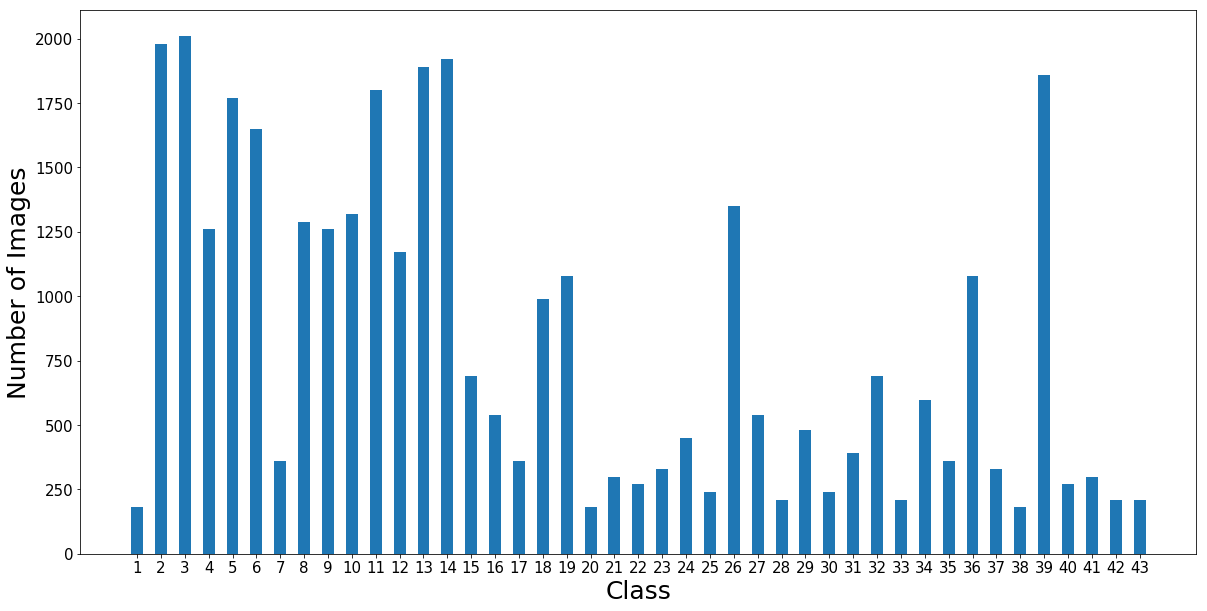

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
count = np.zeros(n_classes)
number_class = []
for r in range(n_train):
    count[y_train[r]] +=1
# np.insert(count,0,0)
for i in range(1,n_classes+1):
    number_class.append(i)
    
plt.figure(figsize=(20,10))
plt.bar(number_class,count,0.5)
plt.xlabel('Class', fontsize= 25)
plt.ylabel('Number of Images', fontsize= 25)
plt.tick_params(labelsize = 15)
plt.xticks(number_class)
plt.show()


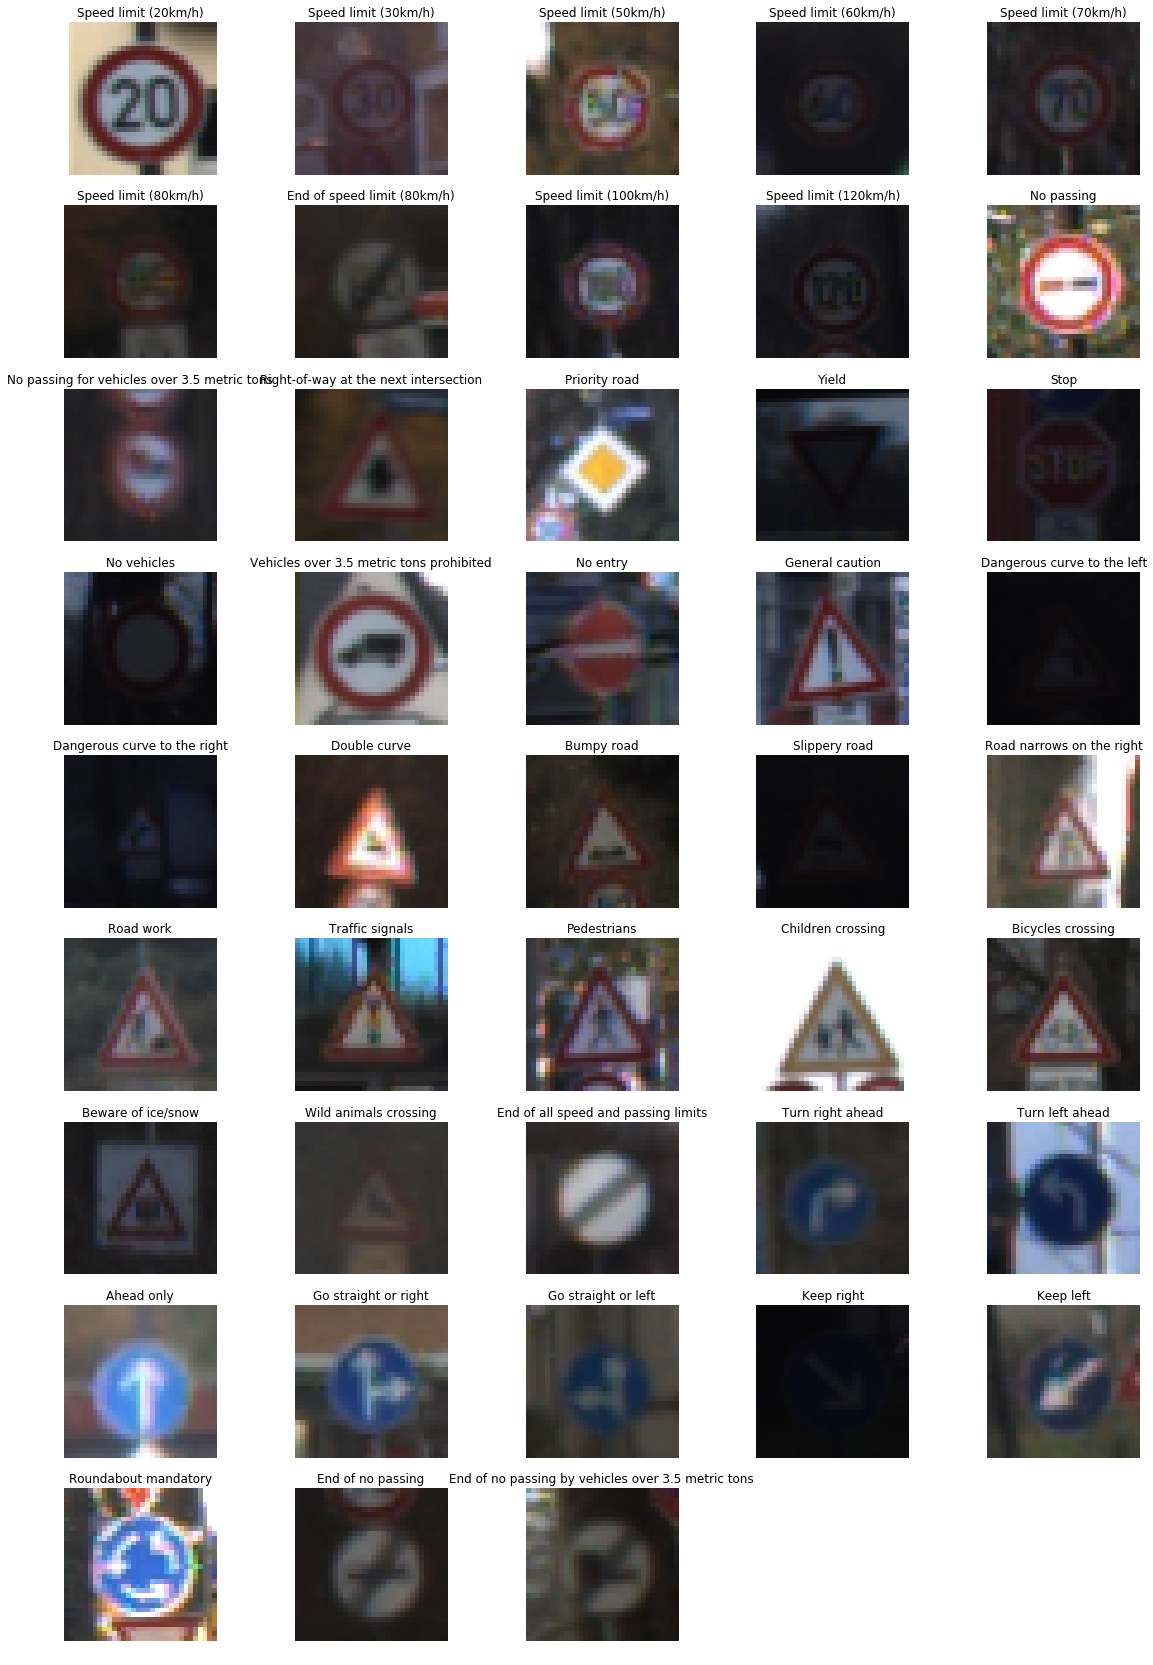

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20,50))
for j in range(n_classes):
    plt.subplot(15,5,j+1)
    img = X_train[y_train == j]
    plt.axis('off')
    plt.imshow(img[0])
    plt.title(labels[j])
plt.show()


## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

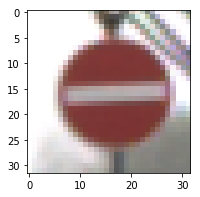

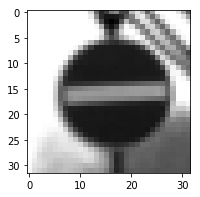

In [4]:
from sklearn.utils import shuffle
from sklearn import preprocessing
import cv2
def normalize(x):
    return (x/128)-1
# def normalize(x):
#     Xmax = 255
#     Xmin = 0
#     a =0.1
#     b = 0.9
    
#     return a+((x-Xmin)*(b-a))/(Xmax-Xmin)



X_train, y_train = shuffle(X_train, y_train)

image = X_train[0].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()


X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)

X_train = normalize(X_train)
X_test = normalize(X_test)
X_valid = normalize(X_valid)

image = X_train[0].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image,cmap= 'gray')
plt.show()


### Model Architecture

In [5]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 64
# out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
#     mu = 0.013
#     sigma = 0.11
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    wc1 = tf.Variable(tf.truncated_normal(shape = (5,5,1,32),mean=mu,stddev = sigma)) 
    bc1 = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x,wc1,strides=[1,1,1,1],padding = 'VALID')+ bc1
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(
                            conv1,
                            ksize = [1,2,2,1],
                            strides = [1,2,2,1],
                            padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    wc2 = tf.Variable(tf.truncated_normal(shape = (5,5,32,64),mean=mu,stddev = sigma)) 
    bc2 = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1,wc2,strides=[1,1,1,1],padding = 'VALID')+ bc2
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = conv1 = tf.nn.max_pool(
                                    conv2,
                                    ksize = [1,2,2,1],
                                    strides = [1,2,2,1],
                                    padding = 'VALID')
    
    
    ##### Marcelo Code
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fla = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fw1 = tf.Variable(tf.truncated_normal(shape=(1600, 120),mean=mu,stddev =sigma))
    fb1 = tf.Variable(tf.zeros(120))
    fully1 = tf.matmul(fla,fw1)+fb1
    
    # TODO: Activation.
    fully1 = tf.nn.relu(fully1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fw2 = tf.Variable(tf.truncated_normal(shape=(120, 84),mean=mu,stddev =sigma))
    fb2 = tf.Variable(tf.zeros(84))
    fully2 = tf.matmul(fully1,fw2)+fb2
    
    # TODO: Activation.
    fully2 = tf.nn.relu(fully2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fw3 = tf.Variable(tf.truncated_normal(shape=(84, 43),mean=mu,stddev =sigma))
    fb3 = tf.Variable(tf.zeros(43))
    logits= tf.matmul(fully2,fw3)+fb3
    
    
    return logits

In [6]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

one_hot_y = tf.one_hot(y, 43)

rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.867

EPOCH 2 ...
Validation Accuracy = 0.909

EPOCH 3 ...
Validation Accuracy = 0.939

EPOCH 4 ...
Validation Accuracy = 0.939

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.938

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.949

EPOCH 9 ...
Validation Accuracy = 0.948

EPOCH 10 ...
Validation Accuracy = 0.954

EPOCH 11 ...
Validation Accuracy = 0.932

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.954

EPOCH 14 ...
Validation Accuracy = 0.945

EPOCH 15 ...
Validation Accuracy = 0.943

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.951

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 19 ...
Validation Accuracy = 0.955

EPOCH 20 ...
Validation Accuracy = 0.958

Model saved


In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.940


## Step 3: Test a Model on New Images

### Load and Output the Images

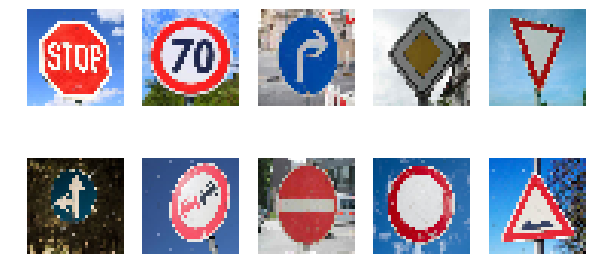

(32, 32, 3)


In [10]:
imgs = ['img1.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg',
       'img6.jpg', 'img7.jpg', 'img8.jpg', 'img9.jpg', 'img10.jpg']
test_images = np.zeros([10, 32, 32, 3])

plt.figure(figsize = (10,5))

for i,n in enumerate(imgs):
    figs = cv2.imread('test_images/'+n)
    figs = cv2.cvtColor(figs, cv2.COLOR_BGR2RGB)
    test_images[i] =  cv2.resize(figs,(32,32))  
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(cv2.resize(figs,(32,32)))
plt.show()

print(test_images[0].shape)

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from .\lenet


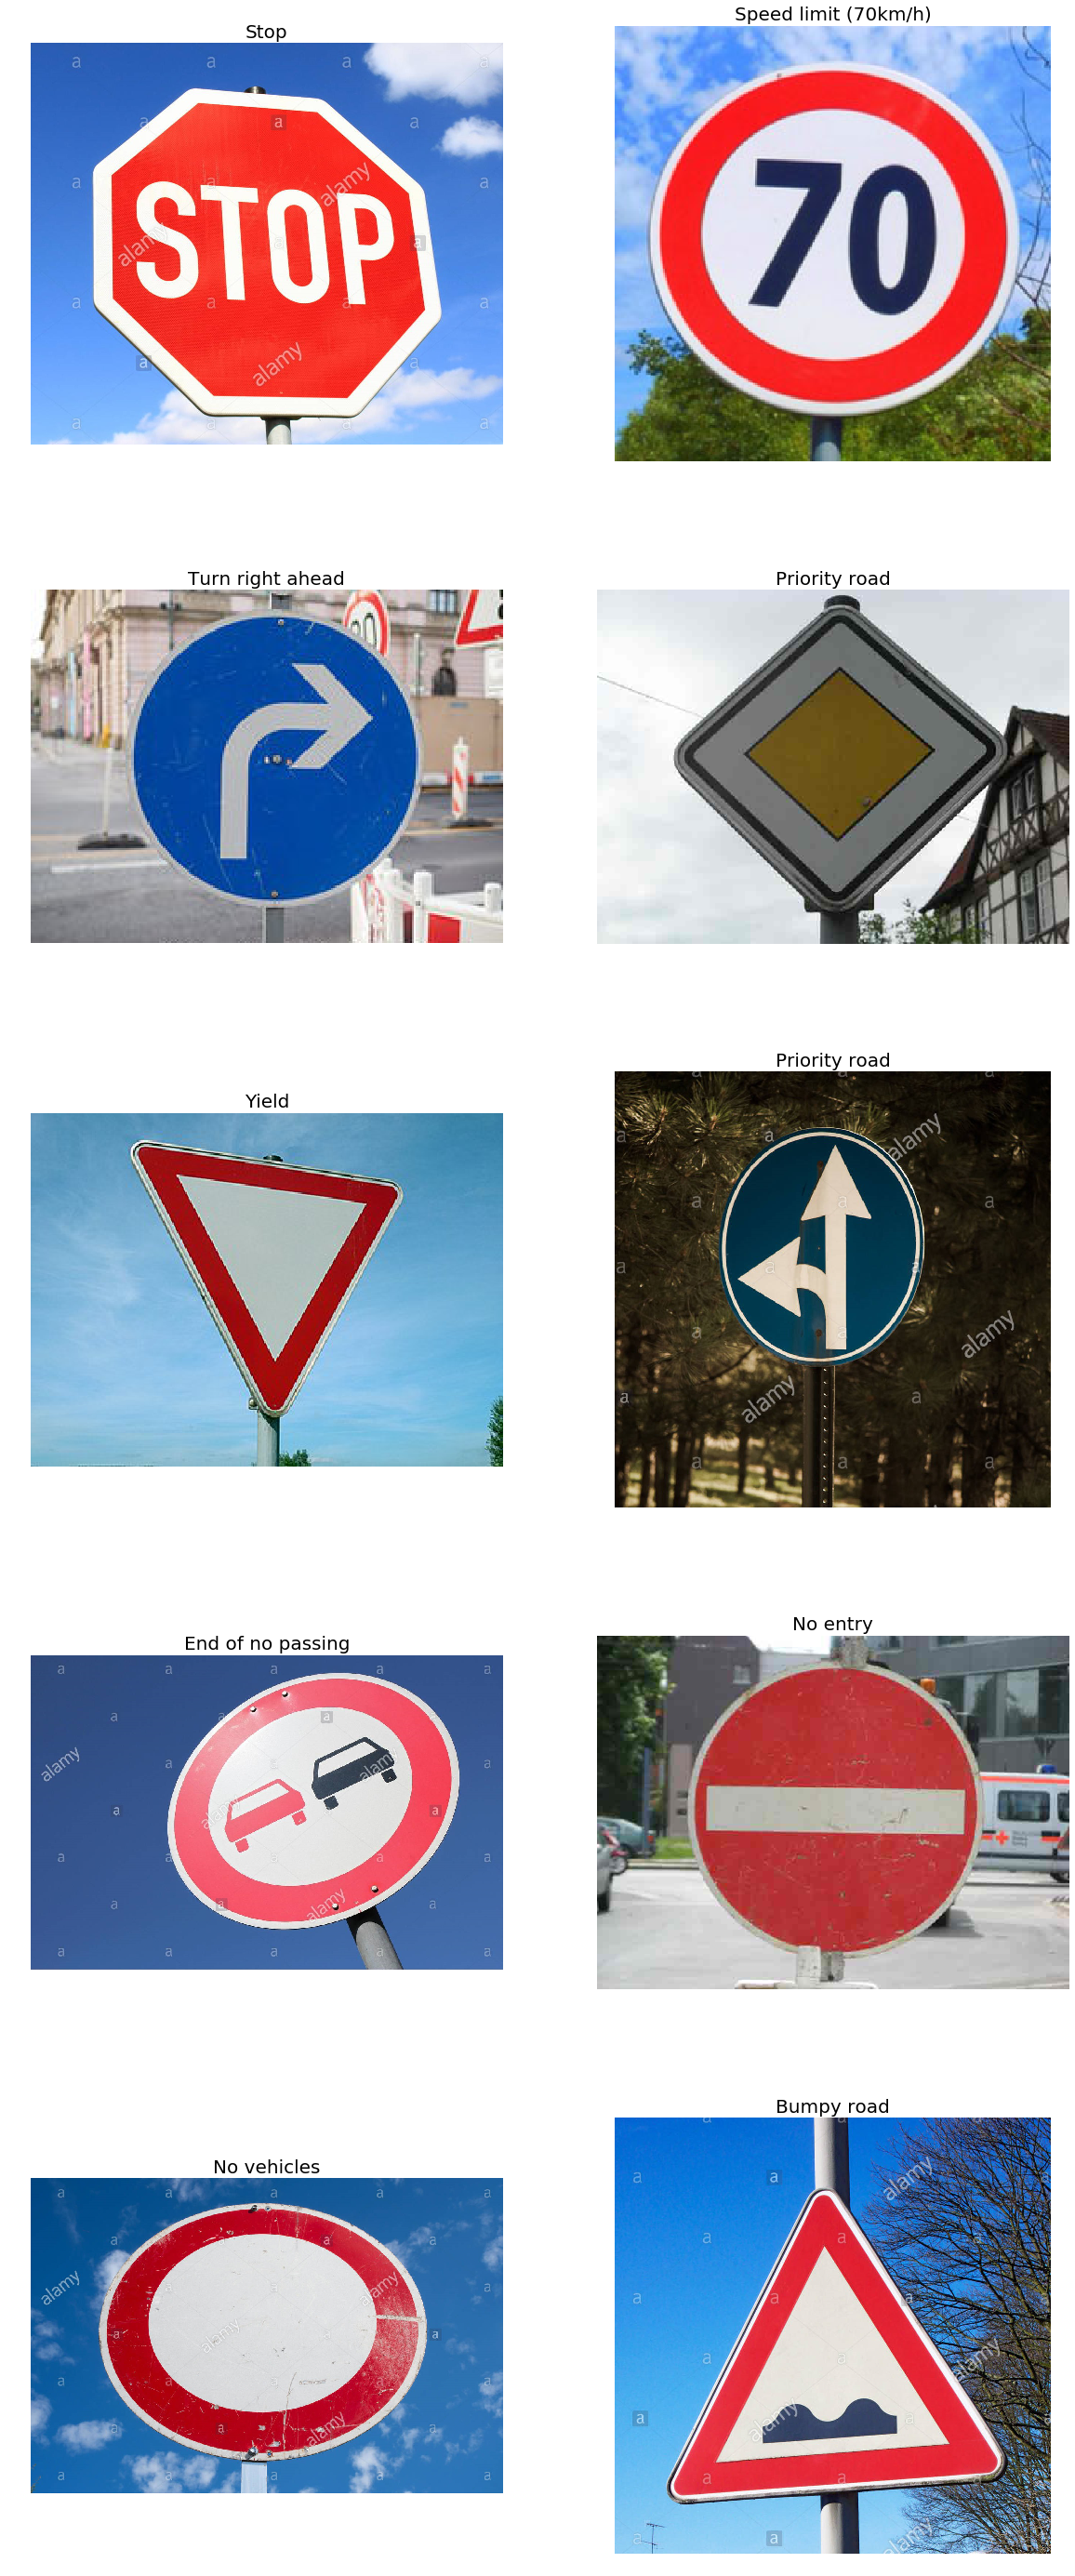

[14  4 33 12 13 12 41 17 15 22]


In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_images = np.sum(test_images/3, axis=3, keepdims=True)
    test_images = normalize(test_images)
    
    predicted_logits = sess.run(logits,feed_dict={x:test_images})
    predicted_labels = np.argmax(np.array(predicted_logits),axis =1)
images = []
plt.figure(figsize = (20,50))
for i,n in enumerate(imgs):
    figs = cv2.imread('test_images/'+n)
    figs = cv2.cvtColor(figs, cv2.COLOR_BGR2RGB)
    plt.subplot(5,2,i+1)
    plt.axis('off')
    plt.title(labels[predicted_labels[i]], fontsize = 20)
    plt.imshow(figs)
    images.append(figs)
plt.show()   
    
    

print(predicted_labels)

### Analyze Performance

In [13]:
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    label_test_images = [14,4,33,12,13,37,41,17,15,22]
    test_accuracy_images = evaluate(test_images,label_test_images)
    print("Test Accuracy = {:.0f}%".format(test_accuracy_images*100))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 90%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from .\lenet


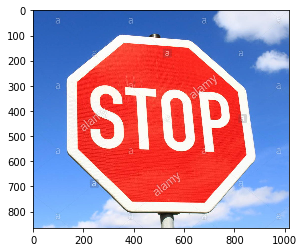

Stop: 99.99%
Speed limit (60km/h): 0.00%
Speed limit (50km/h): 0.00%
Go straight or right: 0.00%
Keep right: 0.00%



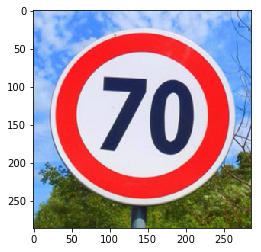

Speed limit (70km/h): 100.00%
Speed limit (20km/h): 0.00%
Speed limit (30km/h): 0.00%
General caution: 0.00%
Speed limit (80km/h): 0.00%



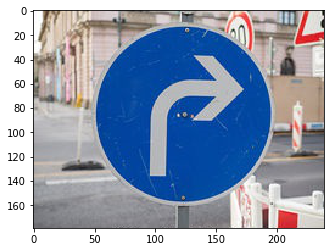

Turn right ahead: 100.00%
Ahead only: 0.00%
Go straight or left: 0.00%
Keep left: 0.00%
Road work: 0.00%



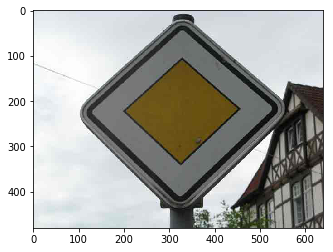

Priority road: 100.00%
Roundabout mandatory: 0.00%
No entry: 0.00%
End of all speed and passing limits: 0.00%
Yield: 0.00%



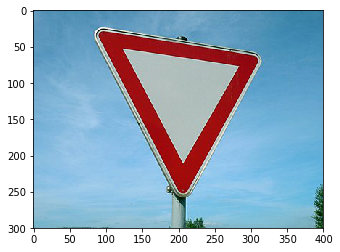

Yield: 100.00%
Children crossing: 0.00%
Speed limit (30km/h): 0.00%
Beware of ice/snow: 0.00%
Speed limit (50km/h): 0.00%



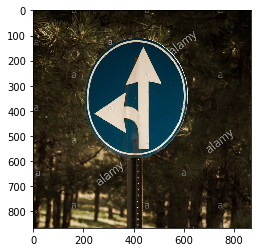

Priority road: 71.11%
No entry: 23.84%
Road work: 2.41%
Traffic signals: 2.29%
Beware of ice/snow: 0.26%



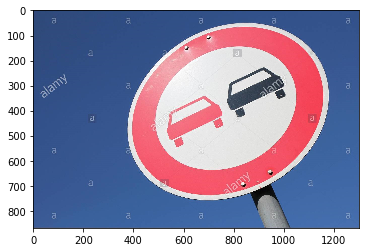

End of no passing: 99.92%
Dangerous curve to the right: 0.05%
No passing: 0.02%
Go straight or right: 0.01%
End of all speed and passing limits: 0.00%



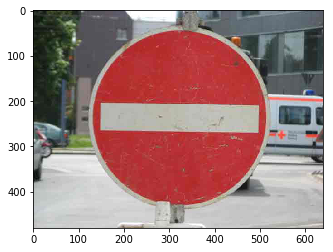

No entry: 100.00%
Stop: 0.00%
Turn right ahead: 0.00%
No passing: 0.00%
Ahead only: 0.00%



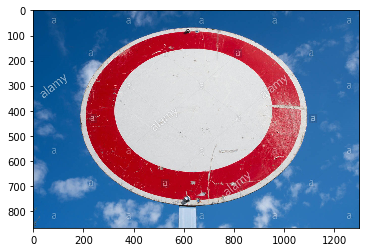

No vehicles: 100.00%
Traffic signals: 0.00%
Yield: 0.00%
Priority road: 0.00%
Speed limit (30km/h): 0.00%



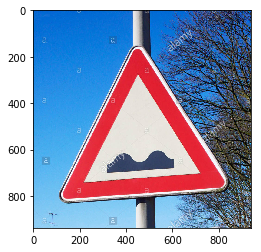

Bumpy road: 100.00%
Keep right: 0.00%
Road narrows on the right: 0.00%
Road work: 0.00%
Traffic signals: 0.00%



In [14]:
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    sftmax = tf.nn.softmax( sess.run(logits,feed_dict={x:test_images}))
    top5 = sess.run(tf.nn.top_k(sftmax,k=5))
    for p,k in enumerate(imgs):
        plt.imshow(images[p])
        plt.show()
        for m in range(5):
            print('{:s}: {:.2f}%'.format(labels[top5[1][p][m]],top5[0][p][m]*100))
        print()